In [ ]:
import numpy   as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [ ]:
result = pd.DataFrame()

for j in range(1 , 250):

#     url = "https://www.flipkart.com/search?q=smartphone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off&page={}".format(j)
#     header = {
#     "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36"}

    website = requests.get("https://www.flipkart.com/search?q=smartphone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off&page={}".format(j)).text

    soup = BeautifulSoup(website, 'lxml')
    phones = soup.find_all('a' , class_="_1fQZEK")

    brand = []
    price = []
    review = []
    memory = []
    rs_off = []
    per_off = []
    rating = []


    for i in phones :

        try :
            brand.append(i.find('div' , class_="_4rR01T").text.split('(')[0])
        except :
            brand.append(np.nan)

        try :
            price.append(i.find('div' , class_="_30jeq3 _1_WHN1").text)

        except :
            price.append(np.nan)

        try :
            rating.append(i.find('div' ,class_="gUuXy-").text.slit()[0])
#               rating.append(i.find('span' , class_="_2_R_DZ").text.slit()[0])


        except :
             rating.append(np.nan)

        try :

            memory.append(i.find('div' , class_="fMghEO").text)

        except :
            memory.append(np.nan)

        try:
            per_off.append(i.find('div' ,class_="_3Ay6Sb").text.split("%")[0])

        except :
            per_off.append(np.nan)

        try :
            rs_off.append(i.find('div' , class_="_3I9_wc _27UcVY").text)
        except :

            rs_off.append(np.nan)

        try :
            review.append(i.find('span' , class_="_2_R_DZ").text.split()[3])

        except :

            review.append(np.nan)


    d = {'brand':brand , 'rating':rating ,  'review':review , 'price':price , 'rs_off':rs_off , 'per_off':per_off , 'memory':memory}

    df = pd.DataFrame(d)

    result = pd.concat([result , df] , ignore_index=True)

# print(len(brand))
# print(len(price))
# print(len(rating))
# print(len(review))
# print(len(memory))
# print(len(per_off))
# print(len(rs_off))


In [ ]:
lap = pd.read_csv('/content/laptops.csv')
df = pd.read_csv('/content/smartphones.csv')

In [ ]:
lap

In [ ]:
df

,brand,rating,review,price,rs_off,per_off,memory
0,Nothing Phone,NaN,NaN,"₹27,999","₹29,999",6.0,12 GB RAM | 256 GB ROM17.02 cm (6.7 inch) Full...
1,Motorola G34 5G,NaN,"1,949","₹11,999","₹14,999",20.0,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...
2,Motorola G34 5G,NaN,"1,949","₹11,999","₹14,999",20.0,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...
3,Motorola G34 5G,NaN,"1,949","₹11,999","₹14,999",20.0,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...
4,POCO C55,NaN,"7,599","₹6,499","₹13,999",53.0,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...
...,...,...,...,...,...,...,...
979,Motorola G9,NaN,"4,716","₹7,999","₹14,999",46.0,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...
980,Nokia G11 Plus TA-1438 DS,NaN,9,"₹7,749","₹13,999",44.0,4 GB RAM | 64 GB ROM16.55 cm (6.517 inch) Disp...
981,itel Vision 3,NaN,61,"₹5,596","₹9,271",39.0,3 GB RAM | 64 GB ROM | Expandable Upto 128 GB1...
982,Tecno Camon 19 Pro,NaN,2,"₹16,149","₹24,999",35.0,8 GB RAM | 128 GB ROM | Expandable Upto 512 GB...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   brand    984 non-null    object 
 1   rating   0 non-null      float64
 2   review   932 non-null    object 
 3   price    984 non-null    object 
 4   rs_off   952 non-null    object 
 5   per_off  948 non-null    float64
 6   memory   984 non-null    object 
dtypes: float64(2), object(5)
memory usage: 53.9+ KB


In [ ]:
df['price'] = df['price'].str.split('₹').str.get(1)

In [ ]:
df['price'] = df['price'].str.replace(',' , '')

In [ ]:
df['price'] = df['price'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   brand    984 non-null    object 
 1   rating   0 non-null      float64
 2   review   932 non-null    object 
 3   price    984 non-null    int64  
 4   rs_off   952 non-null    object 
 5   per_off  948 non-null    float64
 6   memory   984 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 53.9+ KB


In [ ]:
df

,brand,rating,review,price,rs_off,per_off,memory
0,Nothing Phone,NaN,NaN,27999,"₹29,999",6.0,12 GB RAM | 256 GB ROM17.02 cm (6.7 inch) Full...
1,Motorola G34 5G,NaN,"1,949",11999,"₹14,999",20.0,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...
2,Motorola G34 5G,NaN,"1,949",11999,"₹14,999",20.0,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...
3,Motorola G34 5G,NaN,"1,949",11999,"₹14,999",20.0,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...
4,POCO C55,NaN,"7,599",6499,"₹13,999",53.0,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...
...,...,...,...,...,...,...,...
979,Motorola G9,NaN,"4,716",7999,"₹14,999",46.0,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...
980,Nokia G11 Plus TA-1438 DS,NaN,9,7749,"₹13,999",44.0,4 GB RAM | 64 GB ROM16.55 cm (6.517 inch) Disp...
981,itel Vision 3,NaN,61,5596,"₹9,271",39.0,3 GB RAM | 64 GB ROM | Expandable Upto 128 GB1...
982,Tecno Camon 19 Pro,NaN,2,16149,"₹24,999",35.0,8 GB RAM | 128 GB ROM | Expandable Upto 512 GB...


In [ ]:
df['rs_off'] = df['rs_off'].str.split('₹').str.get(1).str.replace(',' , '')

In [ ]:
df['review'] = df['review'].str.replace(',' ,'')

In [ ]:
df

In [ ]:
df.drop(columns=['rating'] , inplace=True)

In [ ]:
df[df['brand'].str.contains('5G')].count()

brand      407
review     400
price      407
rs_off     396
per_off    393
memory     407
dtype: int64

-407 rows  contain 5g in brand columns
-48 rows contain 5g in  memory columns

In [ ]:
df['brand_name'] = df['brand'].str.split().str.get(0)

In [ ]:
df['brand_name'] = df['brand_name'].str.capitalize()

In [ ]:
df['brand_name'].value_counts()

In [ ]:
df['brand'].str.split()

0                     [Nothing, Phone]
1                  [Motorola, G34, 5G]
2                  [Motorola, G34, 5G]
3                  [Motorola, G34, 5G]
4                          [POCO, C55]
                    ...               
979                     [Motorola, G9]
980    [Nokia, G11, Plus, TA-1438, DS]
981                  [itel, Vision, 3]
982            [Tecno, Camon, 19, Pro]
983            [Micromax, IN, Note, 2]
Name: brand, Length: 984, dtype: object

In [ ]:
df['has_5g'] = np.nan

# Update the 'processor' column based on conditions
df.loc[df['brand'].str.contains('5G', case=False, regex=False), 'has_5g'] = '5G'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   brand       984 non-null    object 
 1   review      932 non-null    object 
 2   price       984 non-null    int64  
 3   rs_off      952 non-null    object 
 4   per_off     948 non-null    float64
 5   memory      984 non-null    object 
 6   brand_name  984 non-null    object 
 7   has_5g      407 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 61.6+ KB


In [ ]:
# df['has_5g'] = np.nan

# Update the 'processor' column based on conditions
df.loc[df['memory'].str.contains('5G', case=False, regex=False), 'has_5g'] = '5G'

In [ ]:
df.info()

In [ ]:
df['brand'].sample(30)

In [ ]:
df['ram'] = df['memory'].str.split().str.get(0)

In [ ]:
df['ram'] = df['ram'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   brand       984 non-null    object 
 1   review      932 non-null    object 
 2   price       984 non-null    int64  
 3   rs_off      952 non-null    object 
 4   per_off     948 non-null    float64
 5   memory      984 non-null    object 
 6   brand_name  984 non-null    object 
 7   has_5g      408 non-null    object 
 8   ram         984 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 69.3+ KB


In [ ]:
df['rom']=df['memory'].str.split().str.get(4)

In [ ]:
df['rom'] = df['rom'].str.replace('(' ,'' ).str.replace('.' , '')

In [ ]:
df[df['rom'].str.contains('GB')]

,brand,review,price,rs_off,per_off,memory,brand_name,has_5g,ram,rom
708,OPPO A79 5G,68,17099,22999,25.0,8 GB RAM | 128GB GB ROM17.07 cm (6.72 inch) Di...,Oppo,5G,8,128GB


In [ ]:
df['rom'] = df['rom'].str.replace('GB' ,'' )

In [ ]:
df['rom'] = df['rom'].astype(int)

In [ ]:
df['rom'] = df['rom'].str.split('+').str.get(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   brand       984 non-null    object 
 1   review      932 non-null    object 
 2   price       984 non-null    int64  
 3   rs_off      952 non-null    object 
 4   per_off     948 non-null    float64
 5   memory      984 non-null    object 
 6   brand_name  984 non-null    object 
 7   has_5g      408 non-null    object 
 8   ram         984 non-null    int64  
 9   rom         984 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 77.0+ KB


In [ ]:
df['memory'].str.split().get(0)

['12',
 'GB',
 'RAM',
 '|',
 '256',
 'GB',
 'ROM17.02',
 'cm',
 '(6.7',
 'inch)',
 'Full',
 'HD+',
 'Display50MP',
 '(OIS)',
 '+',
 '50MP',
 '|',
 '32MP',
 'Front',
 'Camera5000',
 'mAh',
 'BatteryDimensity',
 '7200',
 'Pro',
 'Processor1',
 'Year',
 'Manufacturing',
 'Warranty']

In [ ]:
df['battery'] = np.nan

df.loc[df['memory'].str.contains('5000' , case=False, regex=False) , 'battery'] = '5000'
df.loc[df['memory'].str.contains('6000', case=False, regex=False), 'battery'] = '6000'
df.loc[df['memory'].str.contains('4000', case=False, regex=False), 'battery'] = '4000'
df.loc[df['memory'].str.contains('3000', case=False, regex=False), 'battery'] = '3000'
df.loc[df['memory'].str.contains('7000', case=False, regex=False), 'battery'] = '7000'
df.loc[df['memory'].str.contains('4500', case=False, regex=False), 'battery'] = '4500'
df.loc[df['memory'].str.contains('5500', case=False, regex=False), 'battery'] = '5500'
df.loc[df['memory'].str.contains('4600', case=False, regex=False), 'battery'] = '4600'
df.loc[df['memory'].str.contains('5080', case=False, regex=False), 'battery'] = '5080'
df.loc[df['memory'].str.contains('4441', case=False, regex=False), 'battery'] = '4441'
df.loc[df['memory'].str.contains('4400', case=False, regex=False), 'battery'] = '4400'

df.loc[df['memory'].str.contains('3020', case=False, regex=False), 'battery'] = '3020'
df.loc[df['memory'].str.contains('5050', case=False, regex=False), 'battery'] = '5050'
df.loc[df['memory'].str.contains('2500', case=False, regex=False), 'battery'] = '2500'

In [ ]:
df[df['battery'].isnull()]

In [ ]:
df['battery'].isnull().sum()

124

In [ ]:
df['processor'] = np.nan

# Update the 'processor' column based on conditions
df.loc[df['memory'].str.contains('Exynos', case=False, regex=False), 'processor'] = 'Exynos'
df.loc[df['memory'].str.contains('Helio', case=False, regex=False), 'processor'] = 'Helio'
df.loc[df['memory'].str.contains('Dimensity', case=False, regex=False), 'processor'] = 'Dimensity'
df.loc[df['memory'].str.contains('Kirin', case=False, regex=False), 'processor'] = 'Kirin'
df.loc[df['memory'].str.contains('Snapdragon', case=False, regex=False), 'processor'] = 'Snapdragon'
df.loc[df['memory'].str.contains('Apple Bionic', case=False, regex=False), 'processor'] = 'Apple Bionic'
df.loc[df['memory'].str.contains('Unisoc', case=False, regex=False), 'processor'] = 'Unisoc'
df.loc[df['memory'].str.contains('Apple', case=False, regex=False), 'processor'] = 'Apple'
df.loc[df['memory'].str.contains('A1', case=False, regex=False), 'processor'] = 'Apple'
df.loc[df['memory'].str.contains('Tensor', case=False, regex=False), 'processor'] = 'Tensor'
df.loc[df['memory'].str.contains('Google', case=False, regex=False), 'processor'] = 'Google'
df.loc[df['memory'].str.contains('Fusion', case=False, regex=False), 'processor'] = 'Fusion'
df.loc[df['memory'].str.contains('MediaTek', case=False, regex=False), 'processor'] = 'MediaTek'
df.loc[df['memory'].str.contains('Tiger', case=False, regex=False), 'processor'] = 'Tiger'


In [ ]:
df['processor'].value_counts()

processor
Dimensity     144
MediaTek      139
Snapdragon    123
Apple          89
Helio          77
Exynos         50
Unisoc         32
Tensor         12
Tiger           4
Google          4
Name: count, dtype: int64

In [ ]:
df['processor'].isnull().sum()

310

In [ ]:
ok = ['brand_name' , 'price' , 'has_5g' , 'processor' , 'battery' , 'ram' , 'rom', 'rs_off' , 'per_off', 'memory' , 'brand']
df = df[ok]

In [ ]:
df

,brand_name,price,has_5g,processor,battery,ram,rom,rs_off,per_off,memory,brand
0,Nothing,27999,NaN,Dimensity,5000,12,256,29999,6.0,12 GB RAM | 256 GB ROM17.02 cm (6.7 inch) Full...,Nothing Phone
1,Motorola,11999,5G,Snapdragon,5000,8,128,14999,20.0,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,Motorola G34 5G
2,Motorola,11999,5G,Snapdragon,5000,8,128,14999,20.0,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,Motorola G34 5G
3,Motorola,11999,5G,Snapdragon,5000,8,128,14999,20.0,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,Motorola G34 5G
4,Poco,6499,NaN,MediaTek,5000,6,128,13999,53.0,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...,POCO C55
...,...,...,...,...,...,...,...,...,...,...,...
979,Motorola,7999,NaN,Snapdragon,5000,4,64,14999,46.0,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,Motorola G9
980,Nokia,7749,NaN,NaN,5000,4,64,13999,44.0,4 GB RAM | 64 GB ROM16.55 cm (6.517 inch) Disp...,Nokia G11 Plus TA-1438 DS
981,Itel,5596,NaN,Unisoc,5000,3,64,9271,39.0,3 GB RAM | 64 GB ROM | Expandable Upto 128 GB1...,itel Vision 3
982,Tecno,16149,NaN,MediaTek,5000,8,128,24999,35.0,8 GB RAM | 128 GB ROM | Expandable Upto 512 GB...,Tecno Camon 19 Pro


In [ ]:
df.rename(columns={'ram':'phone_storage' , 'rom':'internal_storage'})

In [ ]:
df

,brand_name,price,has_5g,processor,battery,ram,rom,rs_off,per_off,memory,brand
0,Nothing,27999,NaN,Dimensity,5000,12,256,29999,6.0,12 GB RAM | 256 GB ROM17.02 cm (6.7 inch) Full...,Nothing Phone
1,Motorola,11999,5G,Snapdragon,5000,8,128,14999,20.0,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,Motorola G34 5G
2,Motorola,11999,5G,Snapdragon,5000,8,128,14999,20.0,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,Motorola G34 5G
3,Motorola,11999,5G,Snapdragon,5000,8,128,14999,20.0,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,Motorola G34 5G
4,Poco,6499,NaN,MediaTek,5000,6,128,13999,53.0,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...,POCO C55
...,...,...,...,...,...,...,...,...,...,...,...
979,Motorola,7999,NaN,Snapdragon,5000,4,64,14999,46.0,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,Motorola G9
980,Nokia,7749,NaN,NaN,5000,4,64,13999,44.0,4 GB RAM | 64 GB ROM16.55 cm (6.517 inch) Disp...,Nokia G11 Plus TA-1438 DS
981,Itel,5596,NaN,Unisoc,5000,3,64,9271,39.0,3 GB RAM | 64 GB ROM | Expandable Upto 128 GB1...,itel Vision 3
982,Tecno,16149,NaN,MediaTek,5000,8,128,24999,35.0,8 GB RAM | 128 GB ROM | Expandable Upto 512 GB...,Tecno Camon 19 Pro


In [ ]:
df['display_inch'] = np.nan

df.loc[df['memory'].str.contains('6.5', case=False, regex=False), 'display_inch'] = '6.5'
df.loc[df['memory'].str.contains('6.1', case=False, regex=False), 'display_inch'] = '6.1'
df.loc[df['memory'].str.contains('6.2', case=False, regex=False), 'display_inch'] = '6.2'
df.loc[df['memory'].str.contains('6.3', case=False, regex=False), 'display_inch'] = '6.3'
df.loc[df['memory'].str.contains('6.4', case=False, regex=False), 'display_inch'] = '6.4'
df.loc[df['memory'].str.contains('6.6', case=False, regex=False), 'display_inch'] = '6.6'
df.loc[df['memory'].str.contains('6.7', case=False, regex=False), 'display_inch'] = '6.7'
df.loc[df['memory'].str.contains('6.8', case=False, regex=False), 'display_inch'] = '6.8'
df.loc[df['memory'].str.contains('6.9', case=False, regex=False), 'display_inch'] = '6.9'
df.loc[df['memory'].str.contains('6.10', case=False, regex=False), 'display_inch'] = '6.10'
df.loc[df['memory'].str.contains('6.11', case=False, regex=False), 'display_inch'] = '6.11'
df.loc[df['memory'].str.contains('6.12', case=False, regex=False), 'display_inch'] = '6.12'

In [ ]:
df

In [ ]:
df.to_csv('smartphones_eda.csv')

In [ ]:
df['display_inch'].value_counts()

display_inch
6.7    495
6.5    166
6.9     89
6.6     79
6.1     59
6.4     40
6.8     19
6.3     10
6.2     10
Name: count, dtype: int64

In [ ]:
df[df['display_inch'].isnull()]

In [ ]:
df['memory'].str.split().get(0)

106

In [ ]:
dff = pd.read_csv('/content/smartphones_eda.csv')

In [ ]:
dff

In [ ]:
dff[dff['price']<1000]

,Unnamed: 0,brand_name,price,has_5g,processor,battery,ram,rom,rs_off,per_off,memory,brand,display_inch
400,400,Itel,993,NaN,Apple,NaN,32,32,1249.0,20.0,32 MB RAM | 32 MB ROM | Expandable Upto 32 GB4...,itel U30 keypad Mobile|1200 mAh battery|Expand...,NaN
568,568,Taraa,555,NaN,Apple,NaN,32,32,999.0,44.0,32 MB RAM | 32 MB ROM4.5 cm (1.77 inch) Displa...,TARAA 310,NaN
633,633,Taraa,548,NaN,Apple,NaN,32,32,999.0,45.0,32 MB RAM | 32 MB ROM4.5 cm (1.77 inch) Displa...,TARAA 312,NaN


In [ ]:
dff.drop(index=[400 , 568 , 633] , inplace=True)

In [ ]:
dff[dff['price']<1000]

,Unnamed: 0,brand_name,price,has_5g,processor,battery,ram,rom,rs_off,per_off,memory,brand,display_inch


In [ ]:
dff[dff['price']>100000]

,Unnamed: 0,brand_name,price,has_5g,processor,battery,ram,rom,rs_off,per_off,memory,brand,display_inch
406,406,Apple,158990,NaN,Apple,NaN,512,61,164900.0,3.0,512 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,Apple iPhone 15 Pro,6.1
519,519,Apple,102999,NaN,Apple,NaN,512,61,109900.0,6.0,512 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,Apple iPhone 15,6.1
586,586,Apple,112999,NaN,Apple,NaN,512,67,119900.0,5.0,512 GB ROM17.02 cm (6.7 inch) Super Retina XDR...,Apple iPhone 15 Plus,6.7
631,631,Samsung,109999,NaN,Snapdragon,NaN,8,512,113999.0,3.0,8 GB RAM | 512 GB ROM17.02 cm (6.7 inch) Displ...,SAMSUNG Galaxy Z Flip5,6.7
642,642,Apple,177990,NaN,Apple,NaN,1,61,184900.0,3.0,1 TB ROM15.49 cm (6.1 inch) Super Retina XDR D...,Apple iPhone 15 Pro,6.1
700,700,Samsung,129999,5G,Snapdragon,5000.0,12,256,134999.0,3.0,12 GB RAM | 256 GB ROM17.27 cm (6.8 inch) Quad...,SAMSUNG Galaxy S24 Ultra 5G,6.8
712,712,Samsung,129999,5G,Snapdragon,5000.0,12,256,134999.0,3.0,12 GB RAM | 256 GB ROM17.27 cm (6.8 inch) Quad...,SAMSUNG Galaxy S24 Ultra 5G,6.8
744,744,Samsung,129999,5G,Snapdragon,5000.0,12,256,134999.0,3.0,12 GB RAM | 256 GB ROM17.27 cm (6.8 inch) Quad...,SAMSUNG Galaxy S24 Ultra 5G,6.8
865,865,Google,106999,NaN,Tensor,5050.0,12,128,NaN,NaN,12 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Full...,Google Pixel 8 Pro,6.7
868,868,Google,106999,NaN,Tensor,5050.0,12,128,NaN,NaN,12 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Full...,Google Pixel 8 Pro,6.7


In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 0 to 983
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    981 non-null    int64  
 1   brand_name    981 non-null    object 
 2   price         981 non-null    int64  
 3   has_5g        408 non-null    object 
 4   processor     671 non-null    object 
 5   battery       860 non-null    float64
 6   ram           981 non-null    int64  
 7   rom           981 non-null    int64  
 8   rs_off        949 non-null    float64
 9   per_off       945 non-null    float64
 10  memory        981 non-null    object 
 11  brand         981 non-null    object 
 12  display_inch  967 non-null    float64
dtypes: float64(4), int64(4), object(5)
memory usage: 107.3+ KB


In [ ]:
dff['ram']= dff['ram'].replace(1 , 1000)

In [ ]:
dff.isnull().mean()*100

Unnamed: 0       0.000000
brand_name       0.000000
price            0.000000
has_5g          58.536585
processor       31.504065
battery         12.601626
ram              0.000000
rom              0.000000
rs_off           3.252033
per_off          3.658537
memory           0.000000
brand            0.000000
display_inch     1.727642
dtype: float64

In [ ]:
dff['battery'].isnull().sum()

124

In [ ]:
dff[dff['rs_off'].isnull()]

In [ ]:
dff['rs_off'].skew()

2.7307662954868905

In [ ]:
import seaborn as sns

In [ ]:
cols = [var for var in dff.columns if dff[var].isnull().mean()<0.05 and dff[var].isnull().mean()>0 ]

In [ ]:
cols

['rs_off', 'per_off', 'display_inch']

In [ ]:
len(dff[cols].dropna())/len(dff)

0.948170731707317

In [ ]:
new_df = dff[cols].dropna()
dff.shape , new_df.shape

((984, 13), (933, 3))

<Axes: >

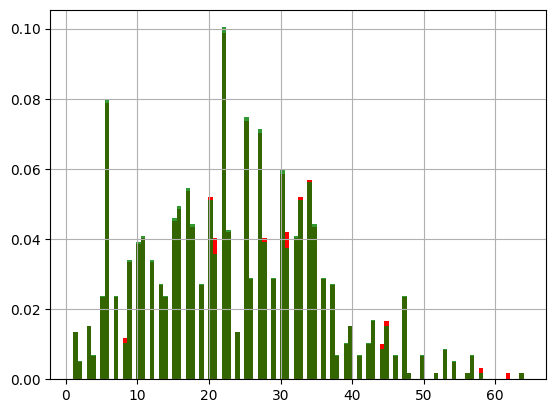

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

dff['per_off'].hist(bins=100 , ax=ax , density=True , color='red')

new_df['per_off'].hist(bins=100 , ax=ax , density=True , color='green' , alpha=0.8)

<Axes: ylabel='Density'>

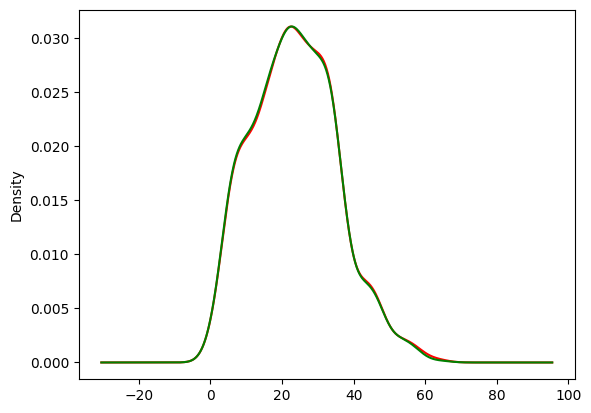

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

dff['per_off'].plot.density( color='red')

new_df['per_off'].plot.density(color='green' )

In [ ]:
dff[dff['rs_off'].isnull()]

In [ ]:
dff['rs_off'].skew()

2.7307662954868905

In [ ]:
righ_df =  dff['rs_off'].fillna(dff['rs_off'].median())

<Axes: >

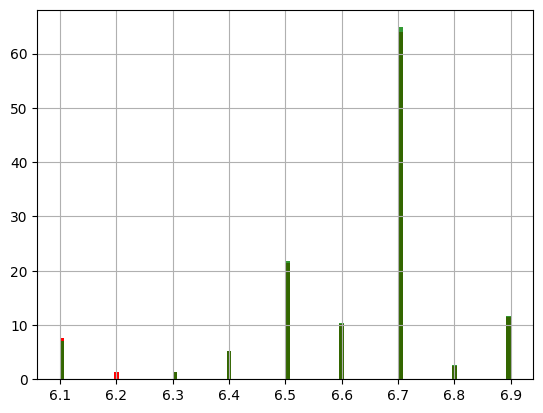

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

dff['display_inch'].hist(bins=100 , ax=ax , density=True , color='red')

new_df['display_inch'].hist(bins=100 , ax=ax , density=True , color='green' , alpha=0.8)

<Axes: ylabel='Density'>

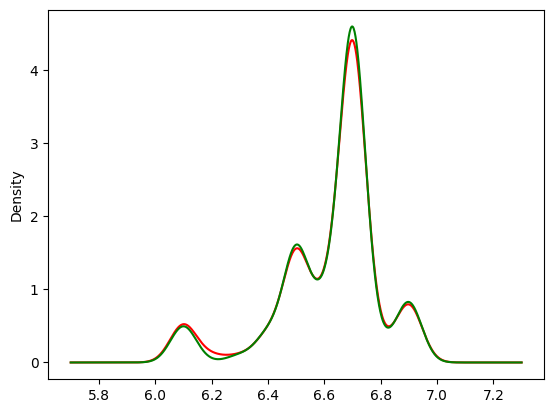

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

dff['display_inch'].plot.density( color='red')

new_df['display_inch'].plot.density(color='green' )

In [ ]:
df['display_inch'].skew()

-1.2192838371380603

In [ ]:
# display inch is neg skew you cant drop this / this is categorical data
# per_off  is 0 skew you can drop this
# rs_off is pos skew you cant drop this

In [ ]:
dff['display_inch'].value_counts()


display_inch
6.7    495
6.5    166
6.9     89
6.6     79
6.1     59
6.4     40
6.8     19
6.3     10
6.2     10
Name: count, dtype: int64

In [ ]:
new_df['display_inch'].value_counts()

display_inch
6.7    484
6.5    162
6.9     87
6.6     78
6.1     53
6.4     39
6.8     19
6.3     10
6.2      1
Name: count, dtype: int64

In [ ]:
temp = pd.concat([
    dff['display_inch'].value_counts()/ len(dff) ,
    new_df['display_inch'].value_counts()/ len(new_df)
] , axis=1)

temp.columns = ['orignal' , 'cca']
temp

,orignal,cca
display_inch,,
6.7,0.503049,0.518757
6.5,0.168699,0.173633
6.9,0.090447,0.093248
6.6,0.080285,0.083601
6.1,0.059959,0.056806
6.4,0.040650,0.041801
6.8,0.019309,0.020364
6.3,0.010163,0.010718
6.2,0.010163,0.001072


###EDA

<Axes: xlabel='brand_name'>

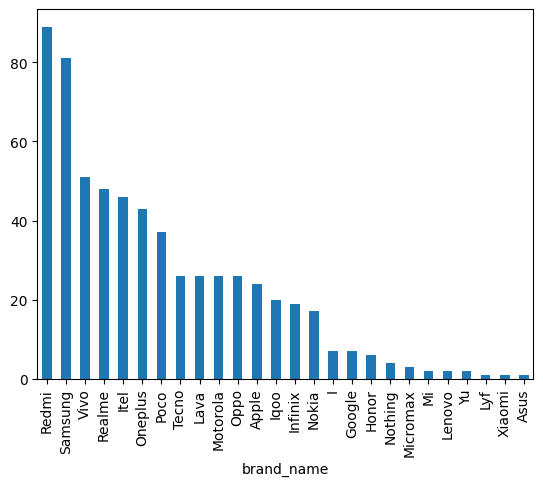

In [ ]:
dff['brand_name'].value_counts().plot(kind='bar' )

<Axes: ylabel='count'>

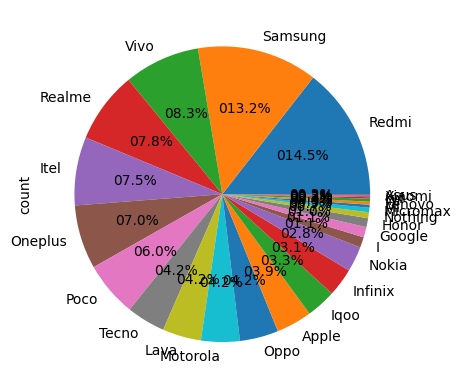

In [ ]:
dff['brand_name'].value_counts().plot(kind='pie' , autopct='0%.1f%%')

<Axes: xlabel='processor'>

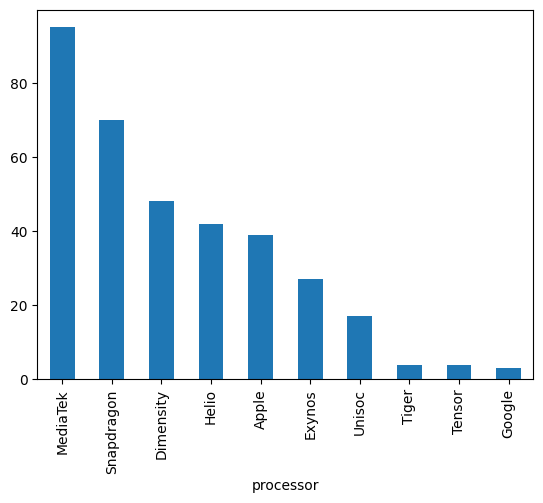

In [ ]:
dff['processor'].value_counts().plot(kind='bar')


<Axes: ylabel='count'>

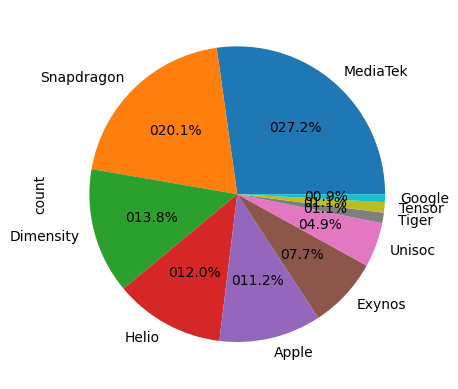

In [ ]:
dff['processor'].value_counts().plot(kind='pie' , autopct='0%.1f%%')

<Axes: xlabel='battery'>

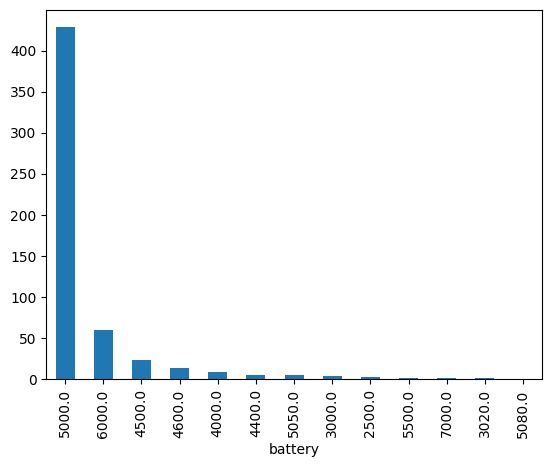

In [ ]:
dff['battery'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

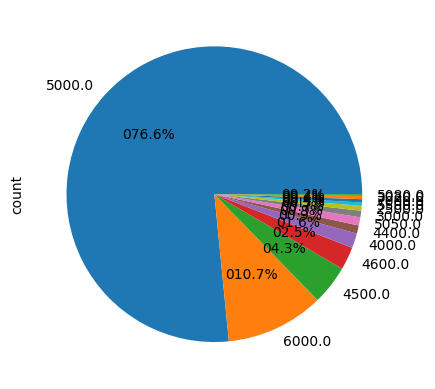

In [ ]:
dff['battery'].value_counts().plot(kind='pie' , autopct='0%.1f%%')

<Axes: xlabel='ram'>

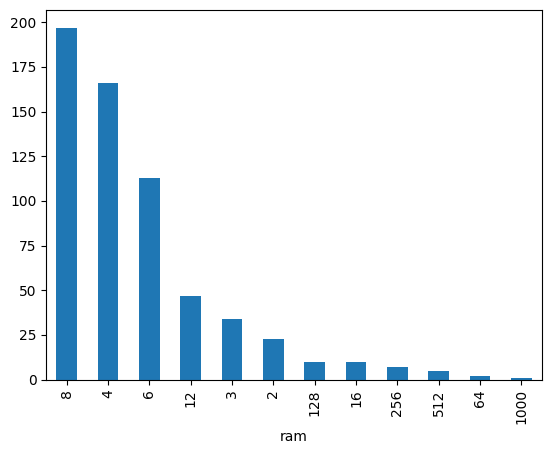

In [ ]:
dff['ram'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

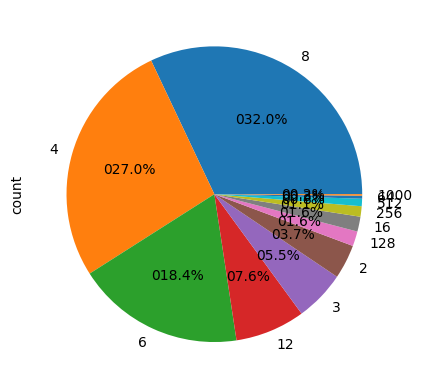

In [ ]:
dff['ram'].value_counts().plot(kind='pie' ,autopct='0%.1f%%' )

<Axes: xlabel='rom'>

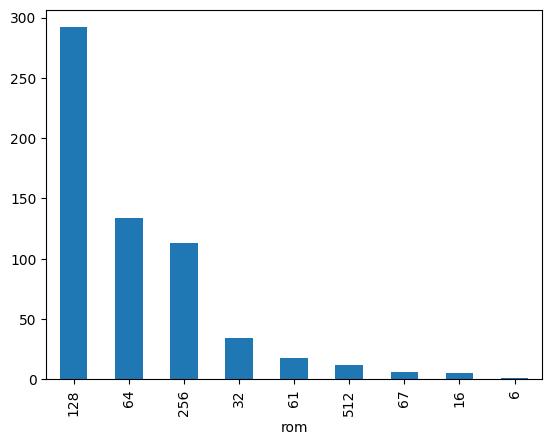

In [ ]:
dff['rom'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

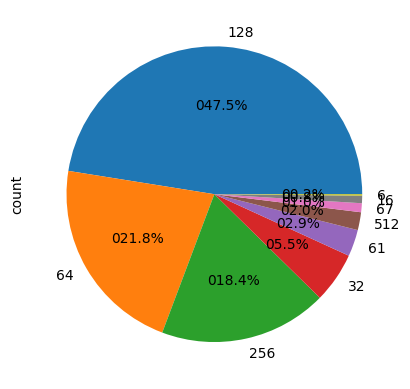

In [ ]:
dff['rom'].value_counts().plot(kind='pie' ,autopct='0%.1f%%' )

<Axes: xlabel='display_inch'>

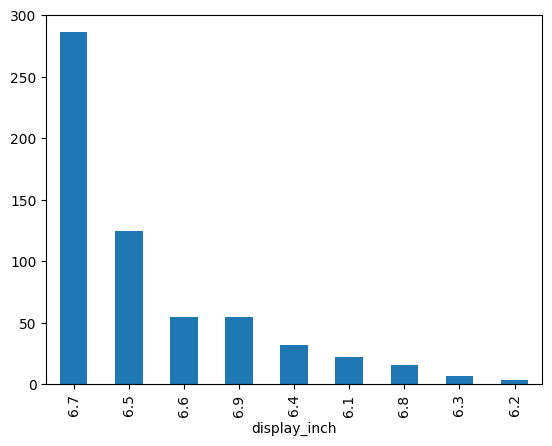

In [ ]:
dff['display_inch'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

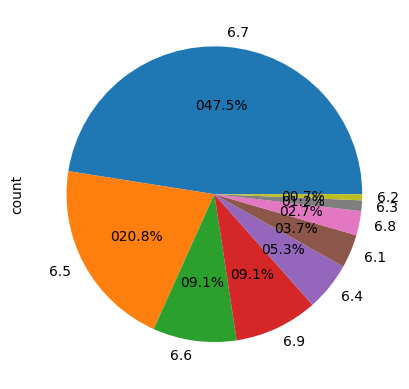

In [ ]:
dff['display_inch'].value_counts().plot(kind='pie' ,autopct='0%.1f%%'  )

,Unnamed: 0,brand_name,price,has_5g,processor,battery,ram,rom,rs_off,per_off,memory,brand,display_inch
0,0,Nothing,27999,NaN,Dimensity,5000.0,12,256,29999.0,6.0,12 GB RAM | 256 GB ROM17.02 cm (6.7 inch) Full...,Nothing Phone,6.7
1,1,Motorola,11999,5G,Snapdragon,5000.0,8,128,14999.0,20.0,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,Motorola G34 5G,6.5
2,2,Motorola,11999,5G,Snapdragon,5000.0,8,128,14999.0,20.0,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,Motorola G34 5G,6.5
3,3,Motorola,11999,5G,Snapdragon,5000.0,8,128,14999.0,20.0,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,Motorola G34 5G,6.5
4,4,Poco,6499,NaN,MediaTek,5000.0,6,128,13999.0,53.0,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...,POCO C55,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,979,Motorola,7999,NaN,Snapdragon,5000.0,4,64,14999.0,46.0,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,Motorola G9,6.5
980,980,Nokia,7749,NaN,NaN,5000.0,4,64,13999.0,44.0,4 GB RAM | 64 GB ROM16.55 cm (6.517 inch) Disp...,Nokia G11 Plus TA-1438 DS,6.5
981,981,Itel,5596,NaN,Unisoc,5000.0,3,64,9271.0,39.0,3 GB RAM | 64 GB ROM | Expandable Upto 128 GB1...,itel Vision 3,6.7
982,982,Tecno,16149,NaN,MediaTek,5000.0,8,128,24999.0,35.0,8 GB RAM | 128 GB ROM | Expandable Upto 512 GB...,Tecno Camon 19 Pro,6.8


### biavariate

In [ ]:
pd.crosstab(dff['brand_name'] , dff['battery'])

battery,2500.0,3000.0,3020.0,4000.0,4400.0,4500.0,4600.0,5000.0,5050.0,5080.0,5500.0,6000.0,7000.0
brand_name,,,,,,,,,,,,,
Asus,0,1,0,0,0,0,0,0,0,0,0,0,0
Google,0,0,0,0,0,0,0,0,1,0,0,0,0
Honor,0,0,0,0,0,0,0,5,0,0,0,0,0
I,1,3,0,0,0,0,0,3,0,0,0,0,0
Infinix,0,0,0,0,0,0,0,13,0,0,0,6,0
Iqoo,0,0,0,0,0,5,4,11,0,0,0,0,0
Itel,0,0,2,7,0,0,0,27,0,0,0,8,2
Lava,0,0,0,0,0,0,0,25,0,0,0,0,0
Lenovo,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
pd.crosstab(  dff['brand_name'] , dff['rom'] )

rom,6,16,32,61,64,67,128,256,512
brand_name,,,,,,,,,
Apple,0,0,0,18,0,6,0,0,0
Asus,0,0,1,0,0,0,0,0,0
Google,0,0,0,0,0,0,6,1,0
Honor,0,0,0,0,0,0,0,4,2
I,0,1,3,0,2,0,1,0,0
Infinix,0,0,0,0,7,0,8,4,0
Iqoo,0,0,0,0,0,0,16,4,0
Itel,0,0,10,0,15,0,16,5,0
Lava,0,0,2,0,12,0,11,1,0


In [ ]:
pd.crosstab(dff['brand_name'] , df['ram'])

ram,1,2,3,4,6,8,12,16,64,128,256,512
brand_name,,,,,,,,,,,,
Apple,1,0,0,0,0,0,0,0,2,9,7,5
Asus,0,0,0,1,0,0,0,0,0,0,0,0
Google,0,0,0,0,0,5,2,0,0,0,0,0
Honor,0,0,0,0,0,4,2,0,0,0,0,0
I,0,4,0,2,1,0,0,0,0,0,0,0
Infinix,0,2,1,8,0,7,1,0,0,0,0,0
Iqoo,0,0,0,0,9,9,2,0,0,0,0,0
Itel,0,8,5,22,0,7,4,0,0,0,0,0
Lava,0,0,5,9,6,6,0,0,0,0,0,0


In [ ]:
pd.crosstab(dff['brand_name'] , df['display_inch'])

display_inch,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9
brand_name,,,,,,,,,
Apple,18,0,0,0,0,0,6,0,0
Google,1,2,2,0,0,0,2,0,0
Honor,0,0,0,0,0,0,6,0,0
I,0,0,0,0,2,1,0,0,0
Infinix,0,0,0,0,0,0,18,1,0
Iqoo,0,0,3,2,0,0,8,0,7
Itel,0,0,0,0,2,7,31,2,1
Lava,0,0,0,0,16,7,3,0,0
Mi,0,0,0,0,0,2,0,0,0


In [ ]:
dff

,Unnamed: 0,brand_name,price,has_5g,processor,battery,ram,rom,rs_off,per_off,memory,brand,display_inch
0,0,Nothing,27999,NaN,Dimensity,5000.0,12,256,29999.0,6.0,12 GB RAM | 256 GB ROM17.02 cm (6.7 inch) Full...,Nothing Phone,6.7
1,1,Motorola,11999,5G,Snapdragon,5000.0,8,128,14999.0,20.0,8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,Motorola G34 5G,6.5
4,4,Poco,6499,NaN,MediaTek,5000.0,6,128,13999.0,53.0,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...,POCO C55,6.7
5,5,Samsung,5999,NaN,MediaTek,5000.0,4,64,11499.0,47.0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,SAMSUNG Galaxy F04,6.5
6,6,Poco,5999,NaN,Helio,5000.0,6,128,10999.0,45.0,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,POCO C51,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,978,Samsung,14990,5G,NaN,5000.0,6,128,19499.0,23.0,6 GB RAM | 128 GB ROM16.51 cm (6.5 inch) Displ...,SAMSUNG GALAXY M13 5G,6.5
979,979,Motorola,7999,NaN,Snapdragon,5000.0,4,64,14999.0,46.0,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,Motorola G9,6.5
980,980,Nokia,7749,NaN,NaN,5000.0,4,64,13999.0,44.0,4 GB RAM | 64 GB ROM16.55 cm (6.517 inch) Disp...,Nokia G11 Plus TA-1438 DS,6.5
981,981,Itel,5596,NaN,Unisoc,5000.0,3,64,9271.0,39.0,3 GB RAM | 64 GB ROM | Expandable Upto 128 GB1...,itel Vision 3,6.7


In [ ]:
duplicate_rows = df[df.duplicated()]

# Extract index numbers of duplicate rows
duplicate_index = duplicate_rows.index

# Display index numbers of duplicate rows

print(duplicate_index)

Index([  3,   8,  11,  12,  15,  17,  18,  19,  20,  21,
       ...
       952, 953, 960, 961, 962, 963, 964, 967, 970, 983],
      dtype='int64', length=365)


In [ ]:
dff = dff.drop(duplicate_index)

In [ ]:
dff.drop(index=[2] , inplace=True)

<Axes: xlabel='has_5g'>

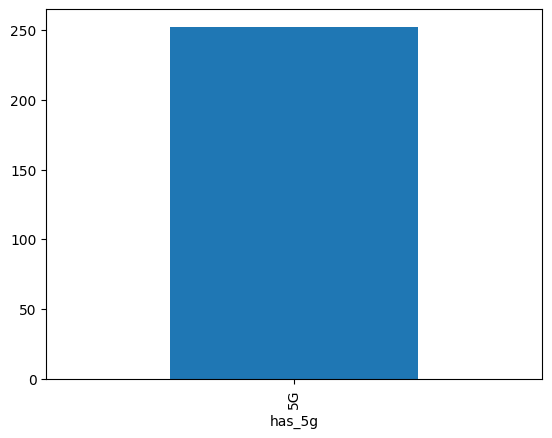

In [ ]:
dff['has_5g'].value_counts().plot(kind='bar')

In [ ]:
pd.crosstab(dff['has_5g'], dff['rom'])

rom,16,64,128,256,512
has_5g,,,,,
5G,1,11,150,83,7


In [ ]:
pd.crosstab(dff['has_5g'], dff['ram'])

ram,3,4,6,8,12,16
has_5g,,,,,,
5G,1,35,55,127,29,5


In [ ]:
pd.crosstab(df['has_5g'] , df['display_inch'])

display_inch,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9
has_5g,,,,,,,,,
5G,9,3,7,16,37,24,233,5,73


In [ ]:
pd.crosstab(df['ram'] , df['rom'])

rom,6,16,32,61,64,67,128,256,512
ram,,,,,,,,,
1,0,0,0,2,0,0,0,0,0
2,0,2,21,0,10,0,0,0,0
3,0,3,17,0,20,0,0,0,0
4,0,0,1,0,137,0,96,3,0
6,0,0,0,0,18,0,138,0,0
8,0,0,0,0,0,0,201,116,1
12,0,0,0,0,0,0,5,100,16
16,0,0,0,0,0,0,1,7,3
32,0,0,3,0,0,0,0,0,0


In [ ]:
pd.crosstab(dff['ram'] , dff['display_inch'])

display_inch,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9
ram,,,,,,,,,
2,0,0,0,0,7,2,6,0,1
3,0,0,0,0,16,5,9,0,0
4,0,0,0,2,56,31,70,3,2
6,0,0,3,9,21,8,50,4,18
8,4,3,4,21,24,7,109,2,23
12,0,1,0,0,1,2,27,5,11
16,0,0,0,0,0,0,9,1,0
64,2,0,0,0,0,0,0,0,0
128,7,0,0,0,0,0,2,1,0


In [ ]:
pd.crosstab(dff['rom'] , dff['display_inch'])

display_inch,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9
rom,,,,,,,,,
6,0,0,0,0,0,0,0,1,0
32,0,0,0,0,16,2,8,0,1
61,18,0,0,0,0,0,0,0,0
64,0,0,0,5,50,29,46,1,3
67,0,0,0,0,0,0,6,0,0
128,3,1,7,23,52,20,153,8,25
256,1,2,0,4,7,4,67,4,23
512,0,1,0,0,0,0,6,2,3


In [ ]:
# iris = sns.load_dataset("iris")
g = sns.PairGrid(dff)
g.map(sns.scatterplot)

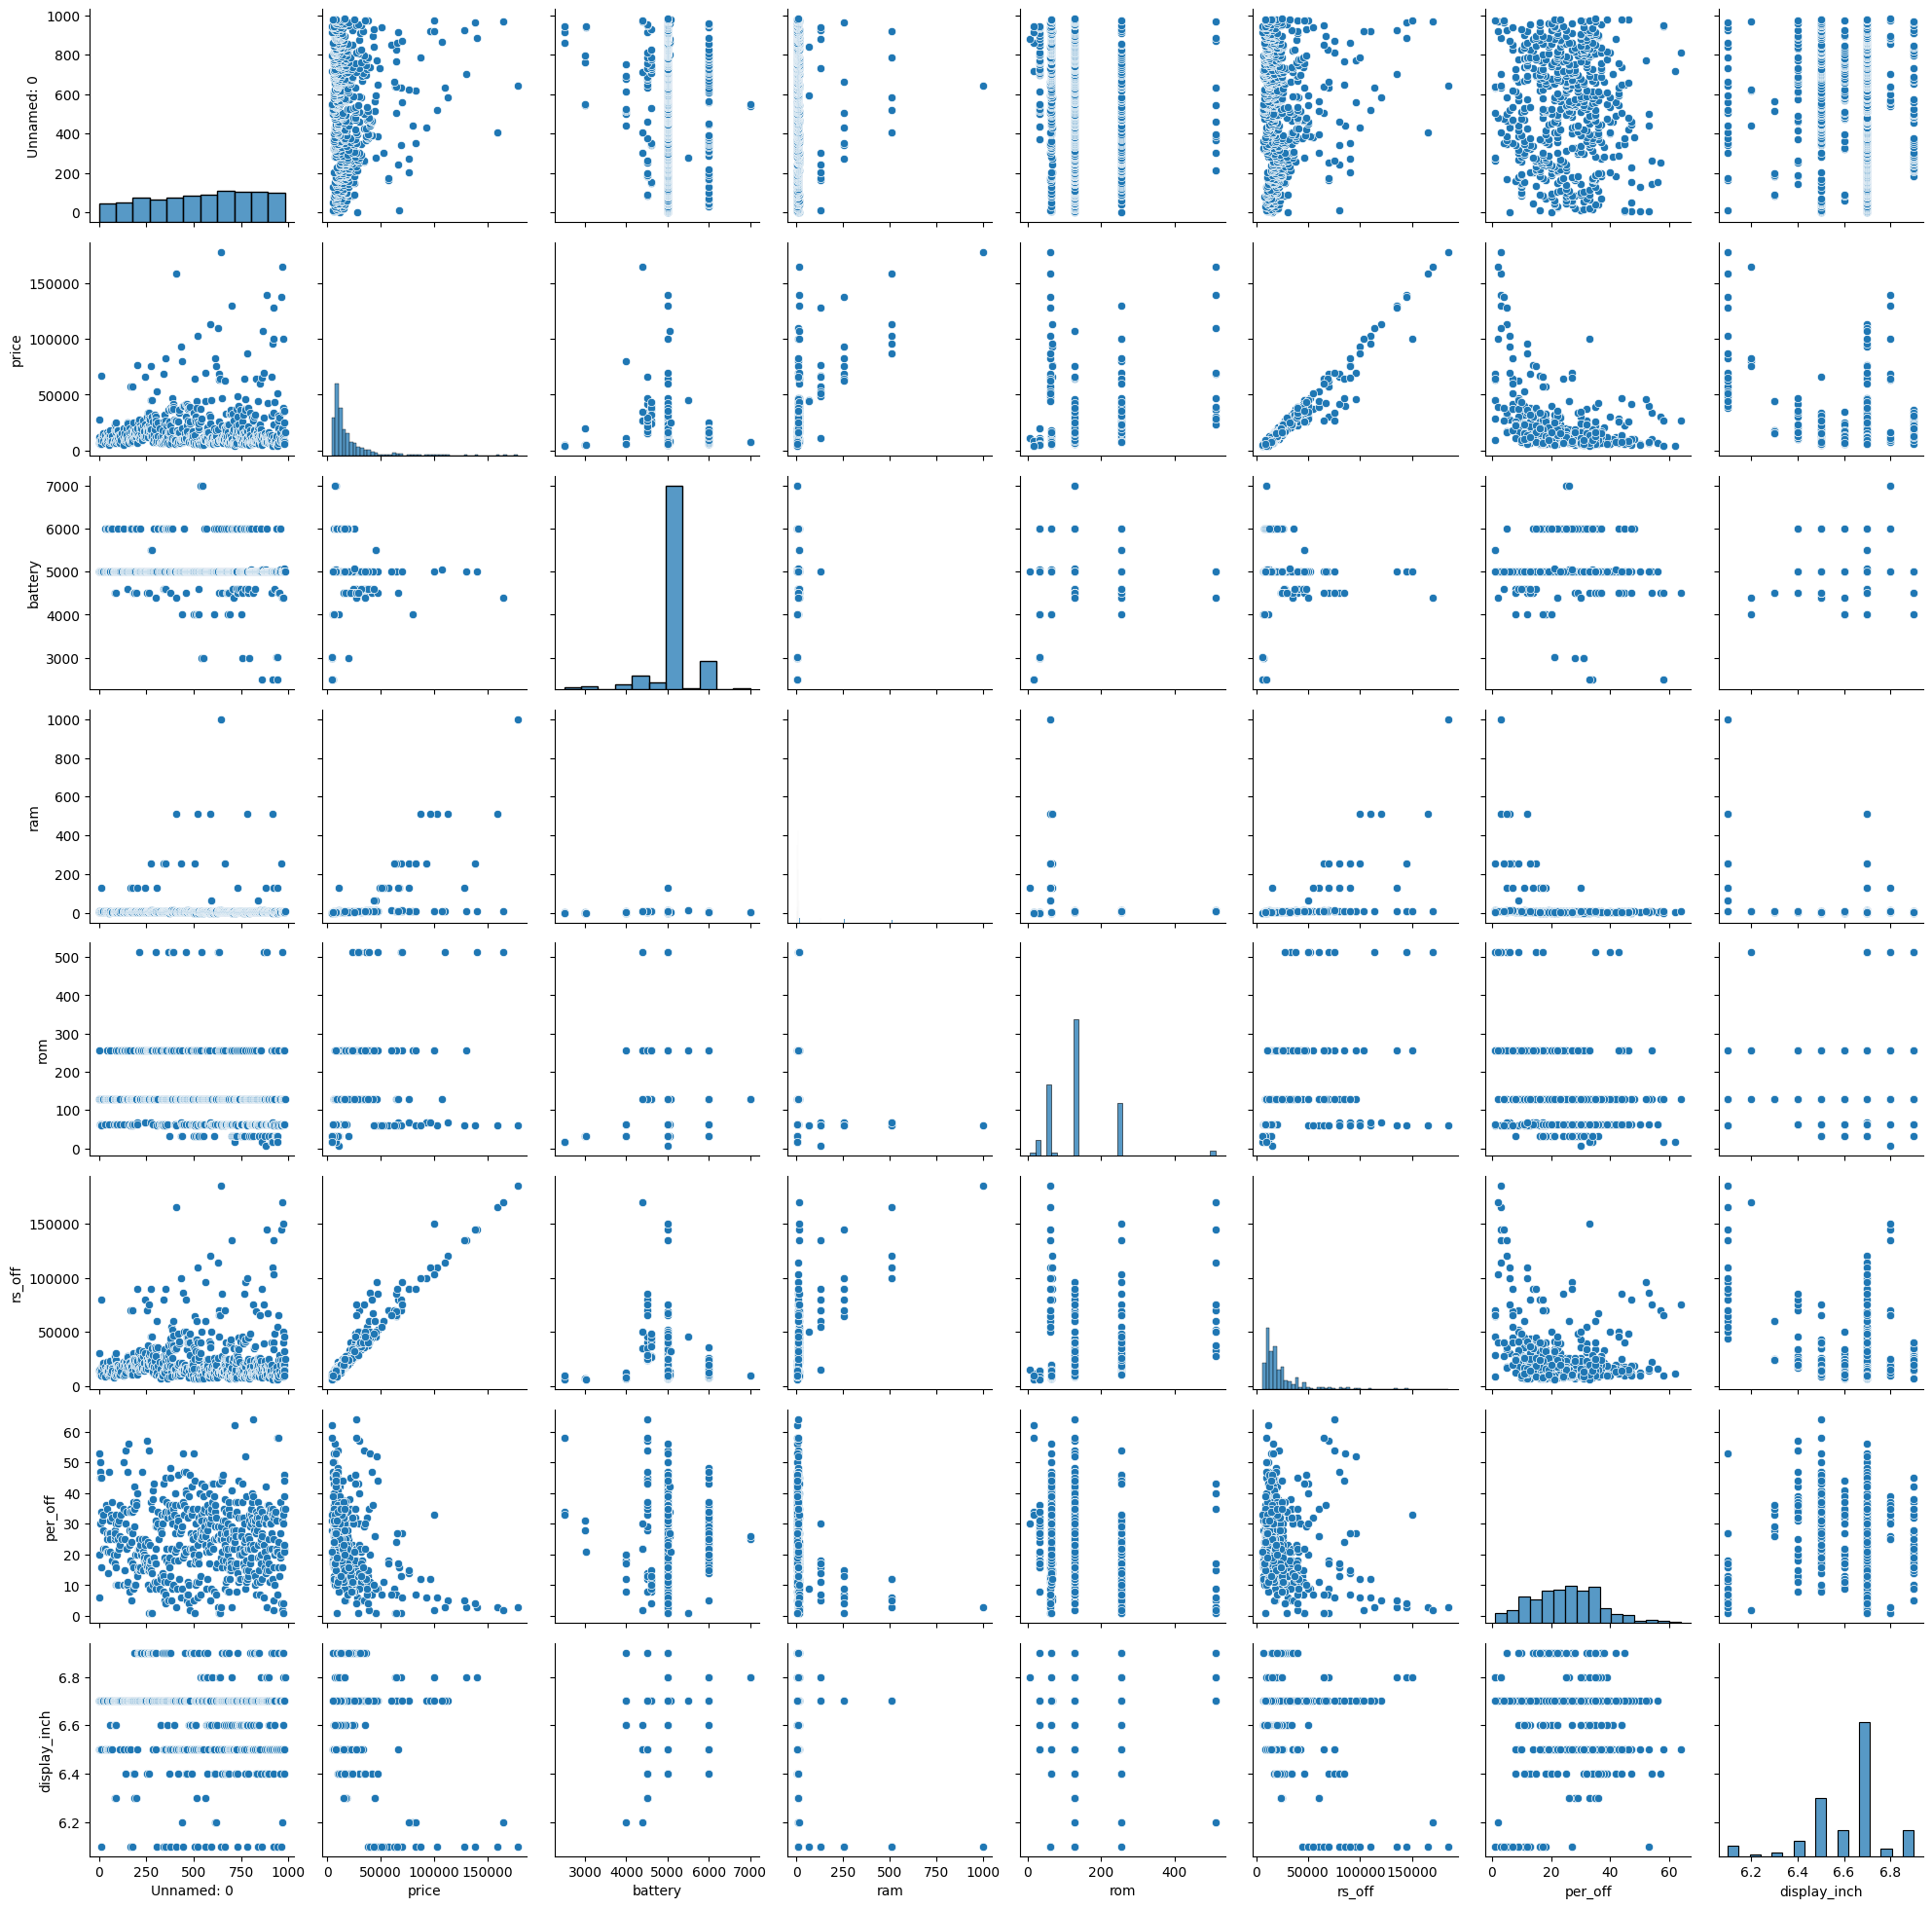

In [ ]:
dff